In [1]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
from scipy.stats import norm
import scipy as sp
from scipy.integrate import odeint,quad,simps,trapz
from scipy.special import eval_hermite,eval_hermitenorm
from math import sqrt,sin,pi,cos,exp,log,factorial
from IPython.core.display import display, HTML
import sys
sys.path.append(r'/mnt/c/Users/Alejandro Lopez/Imperial College London/MSc Project - Alejandro López - MA - General/repository')
figures_route = r'/mnt/c/Users/Alejandro Lopez/Imperial College London/MSc Project - Alejandro López - MA - General/MSc Project - Latex/Figures/'
from nonparametric_generator import *
import matplotlib
def pgf_switch(setting = 'off'):
    if setting == 'off':
        matplotlib.use('module://ipykernel.pylab.backend_inline')
        matplotlib.rcParams.update({
            "pgf.texsystem": "xelatex",
            'font.family': ['sans-serif'],
            'text.usetex': False,
            'pgf.rcfonts': True,
        })
    else:
        matplotlib.use("pgf")
        matplotlib.rcParams.update({
            "pgf.texsystem": "pdflatex",
            'font.family': 'serif',
            'text.usetex': True,
            'pgf.rcfonts': False,
        })

display(HTML("<style>.container { width:95% !important; }</style>"))

### Van der pol Ocillator 
\begin{align}
dx &= \frac{1}{\varepsilon}f(x,y) ds + \frac{\sigma_f}{\sqrt{\varepsilon}} F(x,y) dW \\ 
dy &= g(x,y)ds + \sigma_g G(x,y)dW
\end{align}

$$\mathcal{L}_{\epsilon}h = \frac{1}{\varepsilon}\left[f(x,y) \cdot \nabla_x h + \frac{\sigma_f^2}{2} \Delta_x h \right]$$ 
$$\mathcal{L}_{y} h = g(x,y)\cdot\nabla_y h + \frac{\sigma_g^2}{2}\Delta_y h$$
$$\mathcal{L} = \mathcal{L}_{\epsilon} + \mathcal{L}_y$$


$$f = y - \frac{27}{4} x^2(x+1), \ g=-\frac{1}{2}-x, \ F=1, \ G =1, \ \sigma_f = 0.1, \ \sigma_g = 0.1, \ \varepsilon = 0.01$$

\begin{equation}
dZ = \begin{pmatrix} 1000 (y - \frac{27}{4} x^2(x+1)) \\-\frac{1}{2}-x \end{pmatrix} ds +  \begin{pmatrix} 3.162 & 0  \\ 0 & 0.1  \end{pmatrix} \begin{pmatrix} dW \\ dW\end{pmatrix}
\end{equation}

In [2]:
def Vdpsimulation(x0, n,dt,epsilon=0.001,sg=0.1,sf=0.1):
    """
    Function to create the trayectory of a OU process
    with difussion paramter D 

    :param x0: Intial position
    :param n:  Number of steps
    "param dt: Step size
    :param D:  Difussion parameter

    :return X: Trajectory
    """
    t = np.linspace(x0,dt*n,n)
    X = np.zeros((n,2))
    noise = np.random.normal(loc=0,scale=np.sqrt(dt),size=(n,1))
    for i in range(1,n):
        x = X[i-1,:]
        X[i,0] = x[0] + (1/epsilon)*(x[1] - (27/4)*(x[0]**2)*(x[0]+1))*dt + (sf/sqrt(epsilon))*noise[i]
        X[i,1] = x[1] + (-1/2 - x[0])*dt + sg * noise[i]
    return(X)

In [3]:
x0 = 0
n = int(5e6)
dt = 1e-4
epsilon = 0.01
sg = 0.1
sf = 0.1
X = Vdpsimulation(x0,n,dt,epsilon,sg,sf)

In [6]:
N = 5000
X_s = X[np.random.choice(range(n),size=N),:]

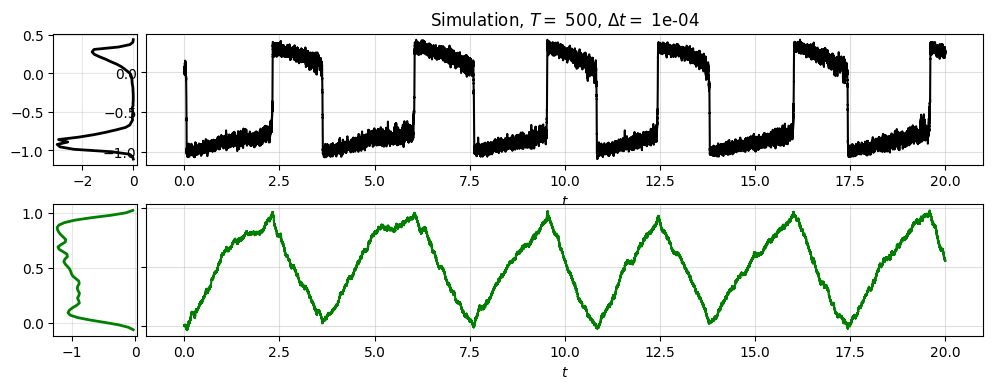

In [21]:
gs1 = GridSpec(2, 2, width_ratios=[1,10],wspace=0.02,hspace=0.3)
fig = plt.figure(figsize=(12,4),dpi=100)

p_eq = density_estimation(X_s[:,0],0.01)
ax1 = fig.add_subplot(gs1[0,0])
_ = ax1.plot([-p_eq([x]) for x in np.linspace(min(X[:,0]),max(X[:,0]))],np.linspace(min(X[:,0]),max(X[:,0])),color='k',lw=2)
_ = ax1.grid(alpha=0.3)

ax2 = fig.add_subplot(gs1[0,1])
_ = ax2.plot(np.linspace(x0,200000*dt,200000), X[:200000,0],color='black')
_ = ax2.grid(alpha=0.4)
_ = ax2.set_xlabel("$t$")
_ = ax2.set_title(f"Simulation, $T=$ {n*dt:.0f}, $\Delta t =$ {dt:.0e}")

ax3 = fig.add_subplot(gs1[1,1])
_ = ax3.plot(np.linspace(x0,200000*dt,200000), X[:200000,1],color='g')
_ = ax3.grid(alpha=0.4)
_ = ax3.set_xlabel("$t$")

p_eq = density_estimation(X_s[:,1],0.1)
ax4 = fig.add_subplot(gs1[1,0])
_ = ax4.plot([-p_eq([x]) for x in np.linspace(min(X[:,1]),max(X[:,1]))],np.linspace(min(X[:,1]),max(X[:,1])),color='g',lw=2)
_ = ax4.grid(alpha=0.3)

(-0.1, 1.05)

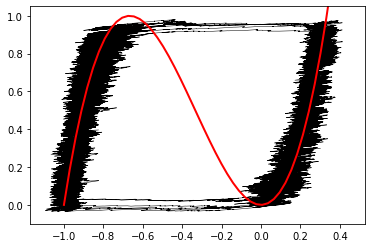

In [25]:
plt.plot(X[:200000,0],X[:200000,1],lw=0.5,color='k')
# plt.xlim(-1.25,0.5)
plt.plot(np.linspace(-1,0.45),[(27/4)*x**2*(x+1) for x in np.linspace(-1,0.45)],color='r',lw=2)
plt.ylim(-0.1,1.05)

In [88]:
fx = lambda x: (27/4)*(x**2)*(x+1)
hy = lambda x:  (1/3)*(-1 - 1/(1 - 2*x  + 2*np.sqrt(-x + x**2))**(1/3) - (1 - 2*x + 2*np.sqrt(-x + x**2))**(1/3))

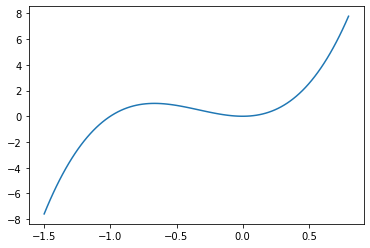

In [93]:
plt.plot(x,fx(x))

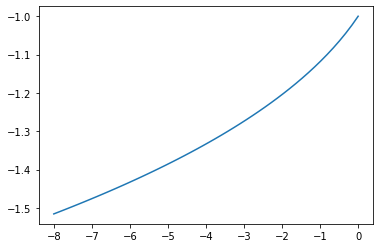

In [97]:
y = -np.linspace(0,8)
plt.plot(y,hy(y))

epsilon = 1.15e-05
d = 0.99


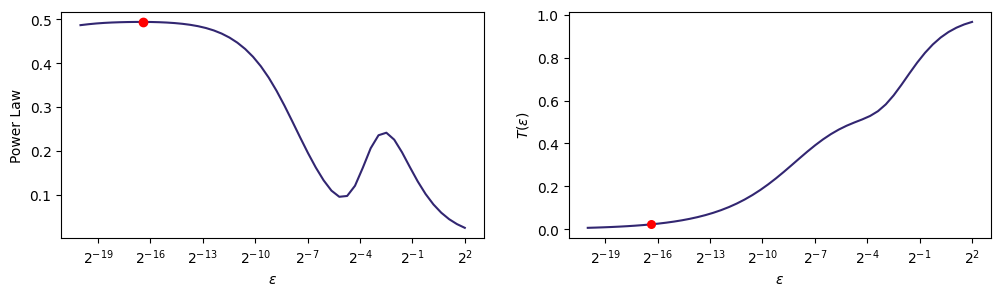

In [26]:
epsilon, d = bandwidth_search(X_s[:,0].reshape(N,1),plot=True,verbose=True)

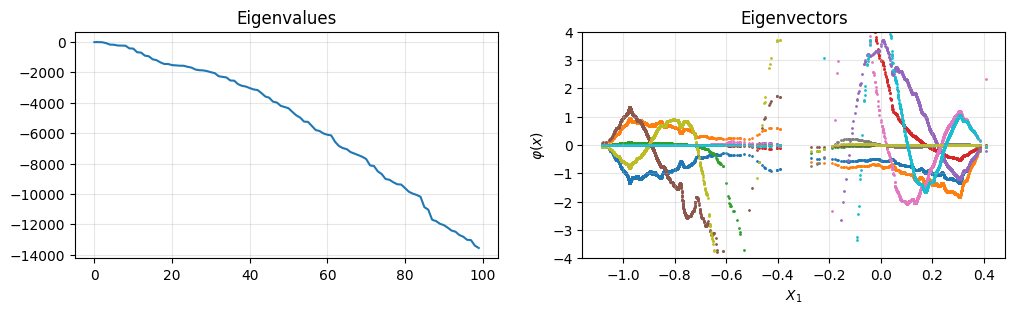

In [33]:
l, phi,L_e, U = KNPGenerator(X_s[:,0].reshape(N,1),M=100,plot=True,return_extra=True)
phi_1 = np.linalg.pinv(phi)

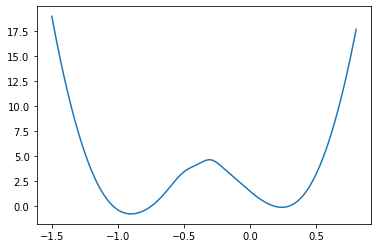

In [54]:
p_eq = density_estimation(X_s[:,0],0.15)
plt.plot(np.linspace(-1.5,0.8,100),-np.log(p_eq(np.linspace(-1.5,0.8,100))))
# plt.ylim(-10,10)

(-5.0, 5.0)

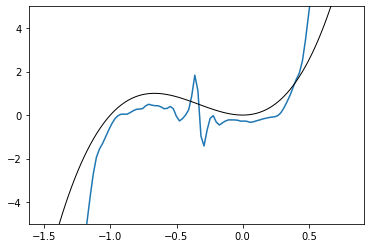

In [65]:
p_eq = density_estimation(X_s[:,0],0.04)
x = np.linspace(-1.5,0.8,100)
plt.plot(x,np.gradient(-np.log(p_eq(x))))
plt.plot(x, (27/4)*(x**2)*(x+1),color='k',lw=1)

plt.ylim(-5,5)

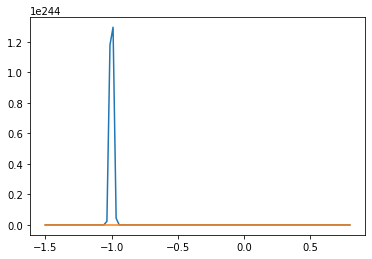

In [82]:
plt.plot(x,np.exp(-(27/4)*(x**3)*((1/4)*x+1/3)/(sg*0.01)))
plt.plot(x,p_eq(x))


(-30.0, 30.0)

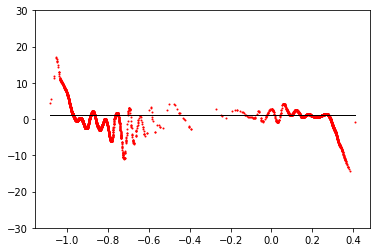

In [40]:
setting = 'off'
pgf_switch(setting)
Y = X_s[:,0]
c_coef =  (sf/N)* Y@U
c_coef1 = (sf) * phi_1 @ Y
# plt.plot(np.sort(X_s,axis=0),np.sum((c_coef*l) * phi,axis=1)[np.argsort(X_s,axis=0)],color='b',lw=1,ls='--')
plt.scatter(X_s[:,0],np.sum((c_coef1*l) * phi,axis=1),s=1,color='r')
x = np.linspace(min(Y),max(Y))
plt.plot(x, 0*x+1,color='k',lw=1)
# plt.xlim(-3.5,3.5)
plt.ylim(-30,30)


In [91]:
h    = lambda x,y : np.exp(-x**2 - y**2)
dhx  = lambda x,y : -2*x*h(x,y)
dhy  = lambda x,y : -2*y*h(x,y)
ddhx = lambda x,y : (-2*h(x,y) + 4*x**2)*h(x,y)
ddhy = lambda x,y : (-2*h(x,y) + 4*y**2)*h(x,y)

Lx = lambda x,y: (y - (27/4)*x**2 * (x+1))*dhx(x,y) + (sf**2 / 2)*ddhx(x,y)
Ly = lambda x,y: (-1/2 - x)*dhy(x,y) + (sg**2 / 2)*ddhy(x,y)
L  = lambda x,y: (1/epsilon)*Lx(x,y) + Ly(x,y)  

In [92]:
phi_1 = np.linalg.pinv(phi)

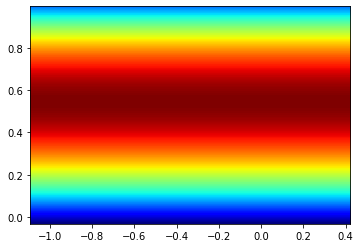

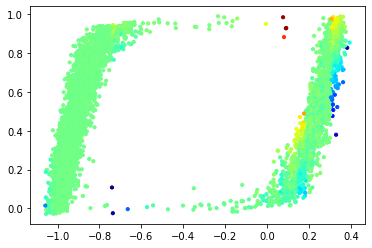

In [93]:
x = np.linspace(min(X[:,0]), min(X[:,0]), 120)
y = np.linspace(min(X[:,1]), max(X[:,1]), 120)
X1, X2 = np.meshgrid(x, y)
r1 = L(X1,X2)
plt.imshow(r1,extent=[min(X[:,0]),max(X[:,0]),min(X[:,1]),max(X[:,1])],cmap='jet')
Y = h(X_s[:,0],X_s[:,1])
plt.figure()
c_coef = sg * Y @ U
plt.scatter(X_s[:,0],X_s[:,1],s=10,c=np.sum((c_coef*l) * phi,axis=1),cmap='jet')

In [9]:
Z_1 = X[X[:,0]>-0.25]
Z_2 = X[X[:,0]<=-0.25]

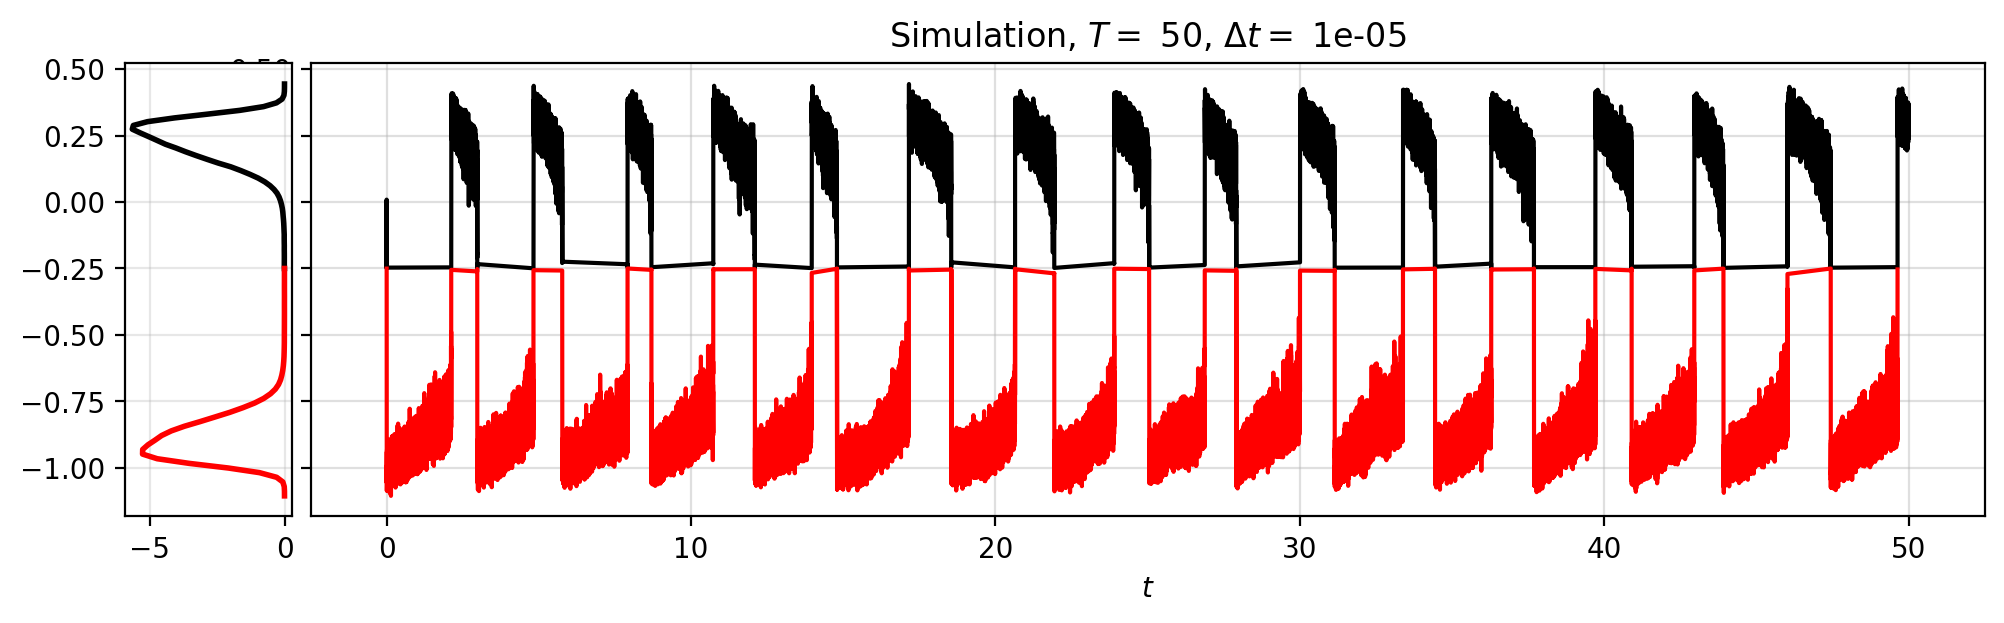

In [10]:
gs1 = GridSpec(1, 2, width_ratios=[1,10],wspace=0.02,hspace=0.3)
fig = plt.figure(figsize=(12,3),dpi=200)
ax1 = fig.add_subplot(gs1[1])
_ = ax1.plot(np.linspace(x0,n*dt,n)[X[:,0]>-0.25], Z_1[:,0],color='black')
_ = ax1.plot(np.linspace(x0,n*dt,n)[X[:,0]<=-0.25], Z_2[:,0],color='red')
_ = ax1.grid(alpha=0.4)
_ = ax1.set_xlabel("$t$")
_ = ax1.set_ylabel("$X_t$")
_ = ax1.set_title(f"Simulation, $T=$ {n*dt:.0f}, $\Delta t =$ {dt:.0e}")
p_eq = density_estimation(Z_1[:,0])
ax2 = fig.add_subplot(gs1[0])
_ = ax2.plot([-p_eq([x]) for x in np.linspace(min(Z_1[:,0]),max(Z_1[:,0]))],
             np.linspace(min(Z_1[:,0]),max(Z_1[:,0])),color='k',lw=2)
_ = ax2.grid(alpha=0.3)
p_eq = density_estimation(Z_2[:,0])
_ = ax2.plot([-p_eq([x]) for x in np.linspace(min(Z_2[:,0]),max(Z_2[:,0]))],
             np.linspace(min(Z_2[:,0]),max(Z_2[:,0])),color='red',lw=2)
_ = ax2.grid(alpha=0.3)

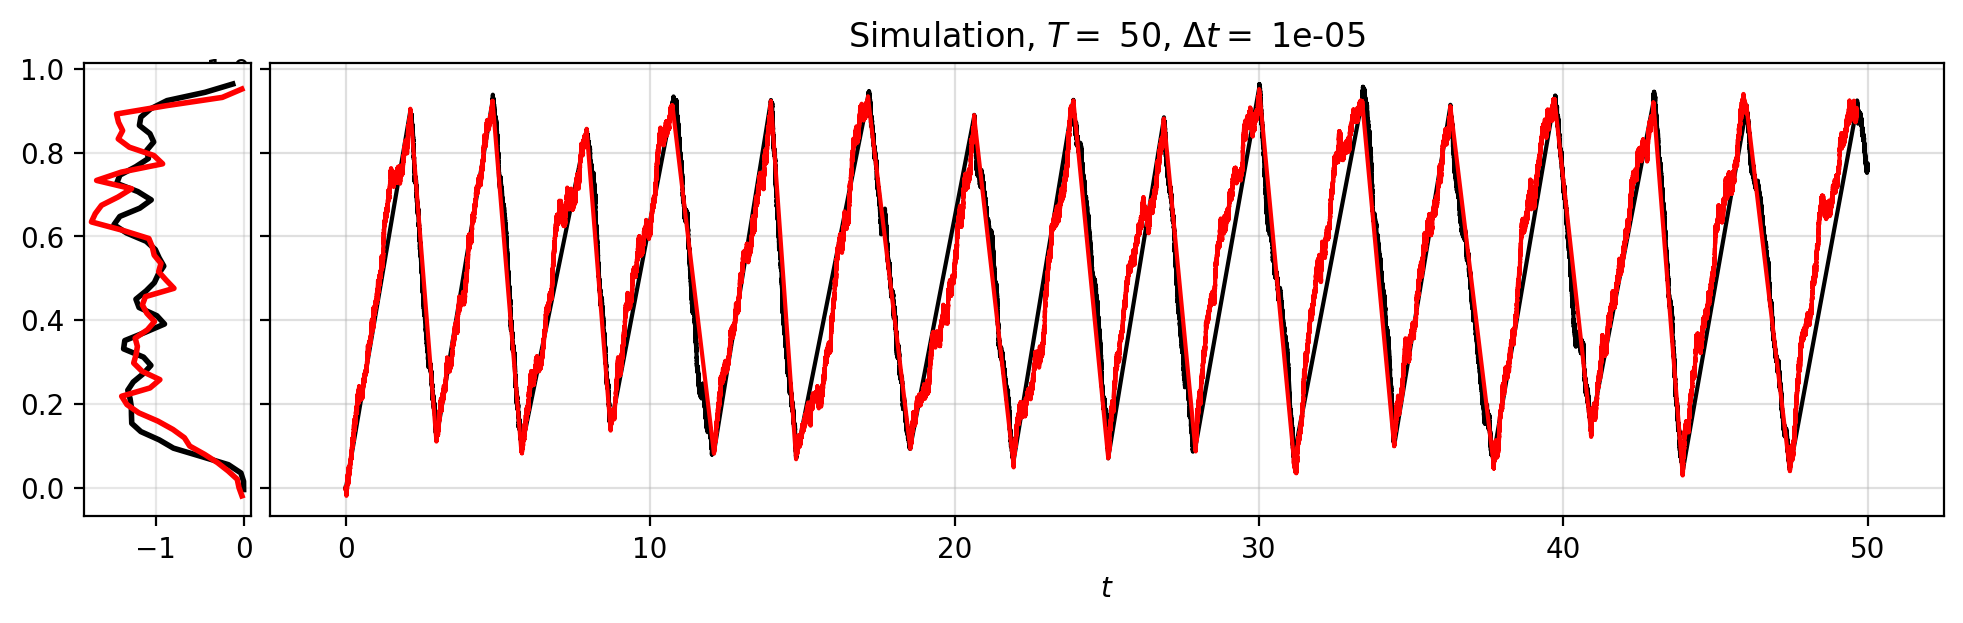

In [11]:
gs1 = GridSpec(1, 2, width_ratios=[1,10],wspace=0.02,hspace=0.3)
fig = plt.figure(figsize=(12,3),dpi=200)
ax1 = fig.add_subplot(gs1[1])
_ = ax1.plot(np.linspace(x0,n*dt,n)[X[:,0]>-0.25], Z_1[:,1],color='black')
_ = ax1.plot(np.linspace(x0,n*dt,n)[X[:,0]<=-0.25], Z_2[:,1],color='red')
_ = ax1.grid(alpha=0.4)
_ = ax1.set_xlabel("$t$")
_ = ax1.set_ylabel("$X_t$")
_ = ax1.set_title(f"Simulation, $T=$ {n*dt:.0f}, $\Delta t =$ {dt:.0e}")
p_eq = density_estimation(Z_1[:,1])
ax2 = fig.add_subplot(gs1[0])
_ = ax2.plot([-p_eq([x]) for x in np.linspace(min(Z_1[:,1]),max(Z_1[:,1]))],
             np.linspace(min(Z_1[:,1]),max(Z_1[:,1])),color='k',lw=2)
_ = ax2.grid(alpha=0.3)
p_eq = density_estimation(Z_2[:,1])
_ = ax2.plot([-p_eq([x]) for x in np.linspace(min(Z_2[:,1]),max(Z_2[:,1]))],
             np.linspace(min(Z_2[:,1]),max(Z_2[:,1])),color='red',lw=2)
_ = ax2.grid(alpha=0.3)

In [12]:
N = 2000
n1,_ = Z_1.shape
n2,_ = Z_2.shape
Z_1_s = Z_1[np.random.choice(range(n1),size=N),:]
Z_2_s = Z_2[np.random.choice(range(n2),size=N),:]

epsilon = 1.22e-03
d = 1.88


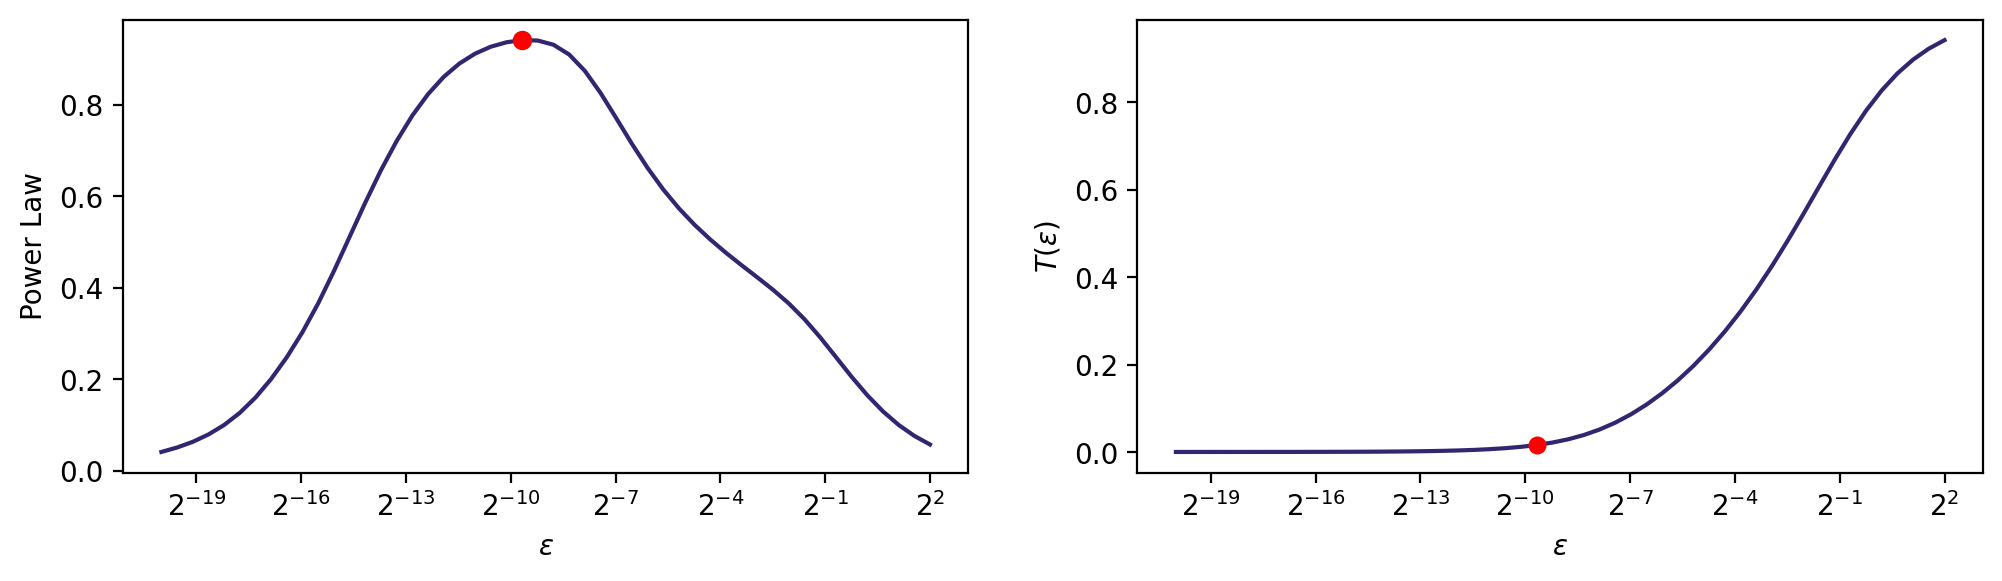

epsilon = 1.67e-03
d = 1.88


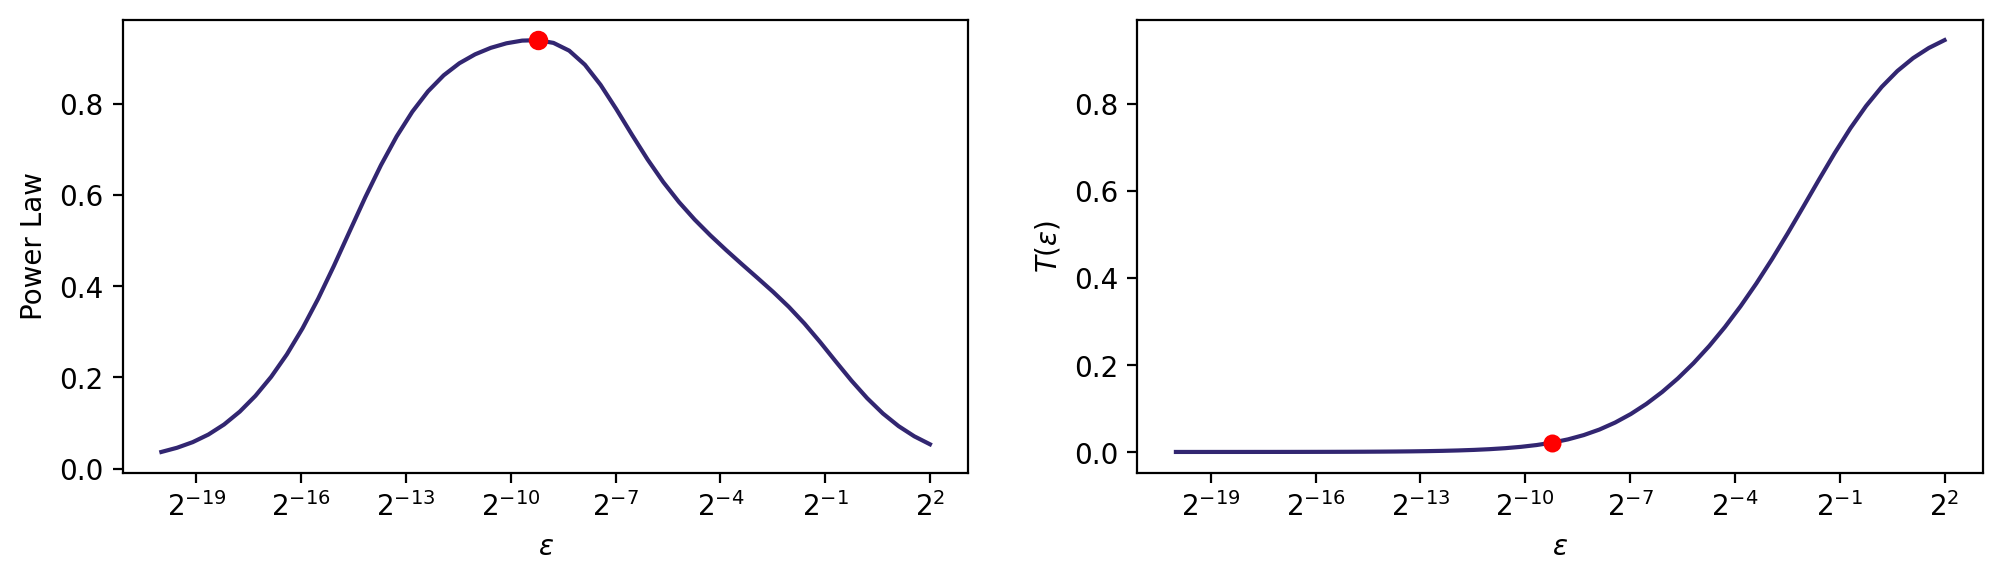

In [13]:
epsilon, d = bandwidth_search(Z_1_s,plot=True,verbose=True)
epsilon, d = bandwidth_search(Z_2_s,plot=True,verbose=True)

In [14]:
l1, phi1,L_e1, U1 = KNPGenerator(Z_1_s,M=1000,plot=False,return_extra=True)
l2, phi2,L_e2, U2 = KNPGenerator(Z_2_s,M=1000,plot=False,return_extra=True)

Text(0.5, 1.0, 'Eigenvectors')

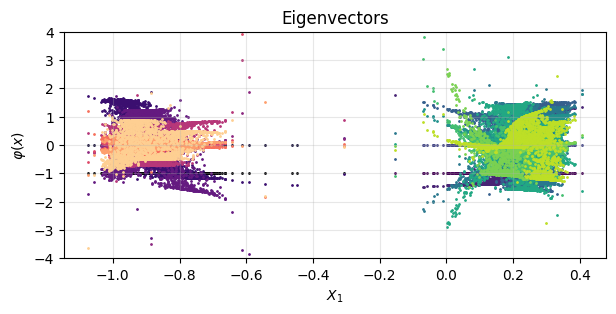

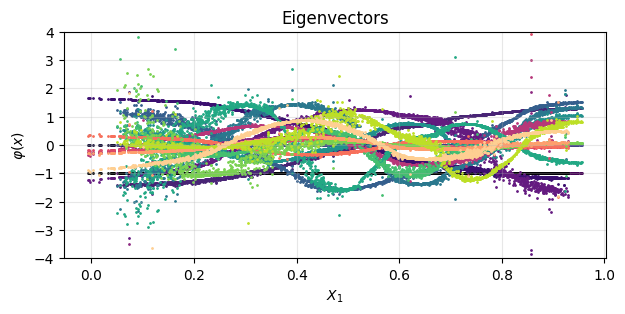

In [15]:
plt.figure(figsize=(7,3),dpi=100)
for i in range(10):
    plt.scatter(Z_1_s[:,0],phi1[:,i],s=1,color=plt.cm.viridis(i/10))
    plt.scatter(Z_2_s[:,0],phi2[:,i],s=1,color=plt.cm.magma(i/10))
plt.grid(alpha=0.3)
plt.ylim(-4,4)
plt.xlabel(f'$X_{1}$')
plt.ylabel(f'$\\varphi(x)$')
plt.title(f'Eigenvectors')

plt.figure(figsize=(7,3),dpi=100)
for i in range(10):
    plt.scatter(Z_1_s[:,1],phi1[:,i],s=1,color=plt.cm.viridis(i/10))
    plt.scatter(Z_2_s[:,1],phi2[:,i],s=1,color=plt.cm.magma(i/10))
plt.grid(alpha=0.3)
plt.ylim(-4,4)
plt.xlabel(f'$X_{1}$')
plt.ylabel(f'$\\varphi(x)$')
plt.title(f'Eigenvectors')

In [52]:
def kernel_matrix(X,Y,sigma=1):
    return np.exp((-distance.cdist(X,Y)**2)/sigma)
def MMD(X,Z):
    M, _ = X.shape 
    K1 = kernel_matrix(X,X)
    K2 = kernel_matrix(Z,Z)
    K3 = kernel_matrix(X,Z)
    H = K1 + K2 - K3 - K3.T
    return (1/(M*(M-1))) * np.sum(H) 

In [55]:
MMDs = np.zeros(1000)
s = 200
for i in range(1000):
    step = i*1000
    MMDs[i] = MMD(X[step:1000+step],X[s+step:1000+s+step])
    

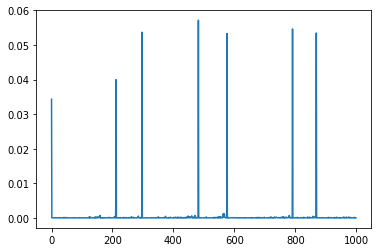

In [57]:
plt.plot(MMDs)